In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import librosa
from IPython.display import Audio


In [2]:
sampled_features = pd.read_csv(os.path.join("../data/","sampled_features.csv"), index_col=[0], header=[0,1,2])

In [3]:
sampled_features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
32081        -0.149236  0.348979 -0.256342  0.818010 -0.754737  0.595361   
138317       -0.024289 -0.320302 -0.571483  0.589557 -0.790646  0.336780   
125817        0.568068 -0.857945  0.861216 -1.016349 -0.560541 -0.892692   
117172       -0.492603 -0.944479 -0.732962 -0.879166 -0.951663 -0.611848   
131789        0.107442  1.453892  0.412687  0.914714 -0.158467  0.807896   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        05        06   
track_id                                            ...                       
32081      -0.575464  0.118675 -1.128392 -1.013314  ...  0.021267  0.018633   
138317      1.850241  1.266195  0.189149 -0.537890  ...  0.021862  0.020002   
125817     -1.317466  2.829233 -1.598327 -1.633583  ...  0.034048  0.047383   
117172     -0.969072 -0.495137 -0.722001  0.253871  ...  0.029845  0.023364   
131789      2.293441  6.171995  0.721523  0.457123  ...  0.020036  0.019293   

feature           zcr                                                    \
statistics   kurtosis       max      mean    median       min      skew   
number             01        01        01        01        01        01   
track_id                                                                  
32081       27.748169  0.374023  0.057702  0.051270  0.000000  4.503321   
138317       8.863070  0.256836  0.058061  0.054199  0.011719  1.982626   
125817      97.155006  0.397949  0.014030  0.007812  0.002441  8.558769   
117172       5.088123  0.191406  0.029363  0.020020  0.002441  1.997258   
131789      16.671103  0.528320  0.050367  0.035156  0.000000  3.597306   

feature                             genre  
statistics       std Unnamed: 519_level_1  
number            01 Unnamed: 519_level_2  
track_id                                   
32081       0.037173                 Rock  
138317      0.024780                 Rock  
125817      0.024152                 Rock  
117172      0.024906                 Rock  
131789      0.052730                 Rock  

[5 rows x 519 columns]

#### Preprocessing

In [6]:
col_names = sampled_features.columns[:-1]
features = sampled_features

In [7]:
features['genre'] = sampled_features['genre']

In [8]:
import umap.umap_ as umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
just_stats = features[col_names]
scaled_stats = scaler.fit_transform(just_stats)
scaled_stats = pd.DataFrame(scaled_stats, columns = col_names, index = features.index)
scaled_stats['genre'] = features['genre']

#### UMAP Dimensional Reduction

In [18]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_stats.drop(['genre'], axis=1))
embedding.shape

(1600, 2)

In [19]:
scaled_stats['umap1'] = embedding[:,0]
scaled_stats['umap2'] = embedding[:,1]

In [20]:
scaled_stats.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
32081        -0.155579  0.212617 -0.053619  0.730843 -0.465035  0.248619   
138317       -0.086658 -0.165041 -0.077752  0.541329 -0.484727  0.108244   
125817        0.240088 -0.468418  0.031963 -0.790858 -0.358541 -0.559195   
117172       -0.344982 -0.517247 -0.090118 -0.677057 -0.573026 -0.406734   
131789       -0.013995  0.836090 -0.002385  0.811065 -0.138050  0.363997   

feature                                             ...       zcr            \
statistics                                          ...  kurtosis       max   
number            07        08        09        10  ...        01        01   
track_id                                            ...                       
32081      -0.287660  0.054479 -0.621998 -0.593653  ... -0.070107 -0.191930   
138317      0.962706  0.797923  0.108548 -0.336751  ... -0.341889 -0.817922   
125817     -0.670136  1.810570 -0.882566 -0.928824  ...  0.928750 -0.064123   
117172     -0.490551 -0.343193 -0.396664  0.091089  ... -0.396215 -1.167434   
131789      1.191160  3.976248  0.403737  0.200918  ... -0.229521  0.632293   

feature                                                      genre     umap1  \
statistics      mean    median       min      skew       std                   
number            01        01        01        01        01                   
track_id                                                                       
32081       0.370252  0.609848 -0.687232  0.292387 -0.193599  Rock  8.482478   
138317      0.384422  0.741734  3.711788 -0.578478 -0.661053  Rock  8.187700   
125817     -1.353323 -1.346458  0.229230  1.693487 -0.684725  Rock  7.830398   
117172     -0.748183 -0.796934  0.229230 -0.573423 -0.656291  Rock  7.362324   
131789      0.080772 -0.115524 -0.687232 -0.020628  0.393174  Rock  9.711390   

feature         umap2  
statistics             
number                 
track_id               
32081        8.134830  
138317       7.551839  
125817      11.172392  
117172      11.614587  
131789       9.848545  

[5 rows x 521 columns]

In [21]:
from sklearn.cluster import KMeans
for_clustering = scaled_stats[['umap1', 'umap2']]
for_clustering.head()

feature,umap1,umap2
statistics,,
number,,
track_id,,
32081,8.482478,8.134830
138317,8.187700,7.551839
125817,7.830398,11.172392
117172,7.362324,11.614587
131789,9.711390,9.848545


#### K-means Fitting

In [22]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(for_clustering)
scaled_stats['cluster'] = kmeans.labels_

In [23]:
groups = scaled_stats.groupby('cluster')
for name, group in groups:
    print("cluster num {}: {} items".format(name, len(group)))

cluster num 0: 369 items
cluster num 1: 486 items
cluster num 2: 320 items
cluster num 3: 425 items


#### Plot Results

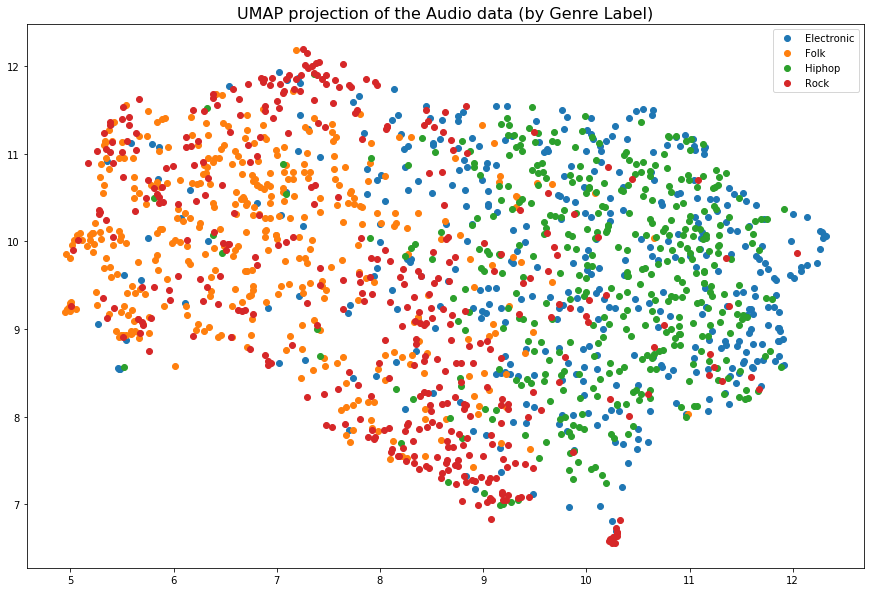

In [49]:
groups = scaled_stats.groupby('genre')
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.umap1, group.umap2, marker='o', linestyle='', label=name)
plt.title('UMAP projection of the Audio data (by Genre Label)', fontsize=16);
ax.legend()
plt.show()

In [25]:
reduced_data = for_clustering.to_numpy()

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

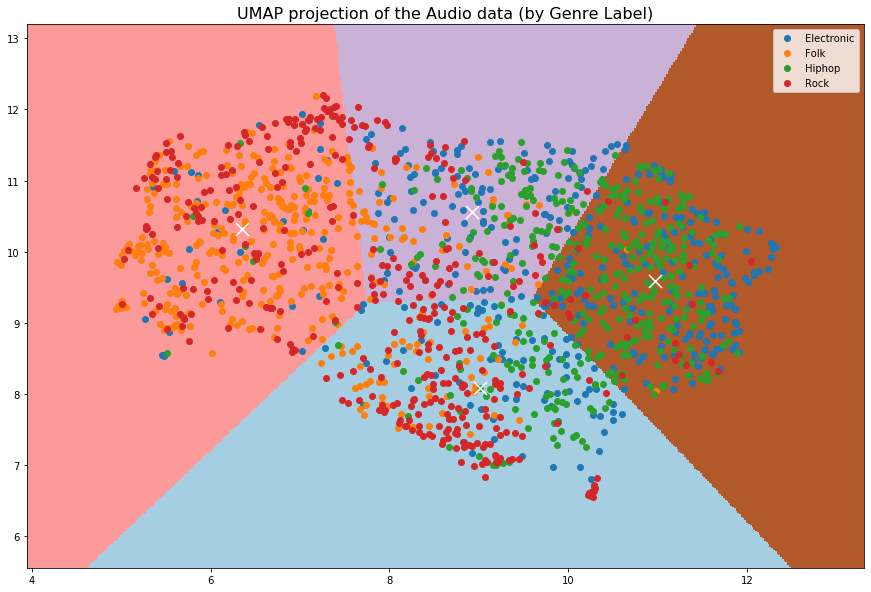

In [50]:
groups = scaled_stats.groupby('genre')
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

for name, group in groups:
    ax.plot(group.umap1, group.umap2, marker='o', linestyle='', label=name)
plt.title('UMAP projection of the Audio data (by Genre Label)', fontsize=16);
ax.legend()

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.show()

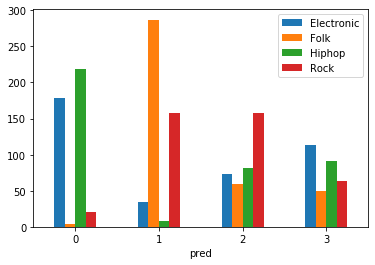

In [119]:
n_sample = 400
results = pd.DataFrame()
results['genre'] = res_df['genre']
results = pd.get_dummies(results['genre'])
results['pred'] = kmeans.labels_
results = results.groupby(['pred']).sum()
results.plot.bar(rot=0);

In [45]:
res_df = pd.concat([scaled_stats['genre'], scaled_stats['umap1'], scaled_stats['umap2']], axis=1)
res_df['track_id'] = res_df.index
res_df['label'] = kmeans.labels_
res_df['label'] = res_df['label'].astype(str)
res_df['x'] = res_df['umap1'] - min(res_df['umap1'])
res_df['x'] = res_df['x'] * (Z.shape[1]/ max(res_df['x']))
res_df['y'] = res_df['umap2'] - min(res_df['umap2'])
res_df['y'] = res_df['y'] * (Z.shape[0]/ max(res_df['y']))
res_df.head()

,genre,umap1,umap2,track_id,label,x,y
track_id,,,,,,,
32081,Rock,8.482478,8.134830,32081,0,224.834488,107.139748
138317,Rock,8.187700,7.551839,138317,0,206.088455,67.558372
125817,Rock,7.830398,11.172392,125817,2,183.366257,313.370758
117172,Rock,7.362324,11.614587,117172,1,153.599640,343.392944
131789,Rock,9.711390,9.848545,131789,2,302.985626,223.490005
